# Linear Regression

Regression is a method by which we model the relationship between one or more independant variables and a dependant variable. The goal is to understand and quantify the relationship between these variables and, perhaps, make predictions for the unknown. For this first iteration of linear regression, we will keep it "simple" by carrying some assumptions: 
+ $ x \in \mathbb{R} $ 
+ The only input variable is $x$

Given this, the form of our hypothesis desired is: 

$$ h(x;w,b) = wx + b$$

where:
+ $x$: the input variable; a feature or features
+ $w$: the slope parameter of the hypothesis; it carries the impact of $x$ on the prediction
+ $b$: the intercept term; the bias term which accounts for the models inability to accurately predict data that isn't purely covariant

Put simply, it's the application of a linear function to most accurately the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv", header=None)
data.rename(columns={0: "x", 1:"y"}, inplace=True)

## The Process

### Determine if there is a linear relationship  
It doesn't make much sense to attempt to describe the data in the form of a line if the data isn't capable of being described that way. A good first step (wherever applicable) is to visualize the data. As the data set used here is in $\mathbb{R}^2$, we can graph the data on a scatterplot to see just how the data are orientated.


(22.86760509940845, 72.60695516341318, 27.362795273772292, 122.9354278753201)

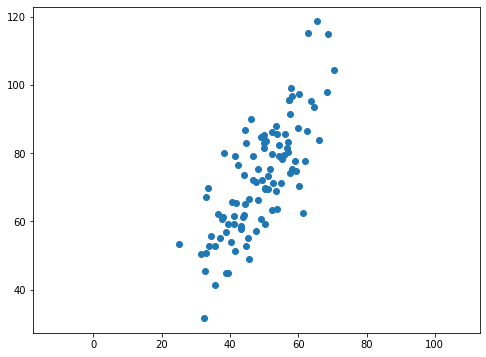

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(data.x,data.y)
plt.axis('equal')

While not a perfect line, there does seem to be a linear relationship; it seems reasonable to represent these data with  a line as compared to something else. Let's show that relationship (and its strength) numerically. The way to do this is to view the covariance:

### Finding the Sample Covariance

$$
Cov(x,y) = \frac{1}{n-1}\sum^{n}_{i=1}(x^{(i)}-\overline{x})(y^{(i)}-\overline{y})
$$

Let's break this formula down:
+ $(x^{(i)}-\overline{x})$ and $(y^{(i)}-\overline{y})$ refer to how deviation from the sample mean
+ We take the summation of the products and divide by the inverse of $n-1$; this is a psuedo-expected value for their relationship.

Note:
$$ Cov(x,x) = Var(x) $$

In the case of simple linear regression, the covariance is a scalar value. When positive, an increase in $x$ yields an *increase* in $y$. When negative, an increase in $x$ yields a *decrease* in $y$. As the values for each column (only two in our case) may scale very differently, the magnitude **does not** carry significant meaning. Most often, covariance is shown as a matrix representation of the relation:
$$
Cov(X,Y) =
 \begin{bmatrix}
Cov(X,X) & Cov(X,Y) \\
Cov(Y,X) & Cov(Y,Y)
\end{bmatrix}
$$

Below, we will show the forumla above at work and the `.cov()` method from `pandas` associated with the dataframe we are using.

In [45]:
xbar = data['x'].mean()
ybar = data['y'].mean()
sum = 0
for index, row in data.iterrows():
    sum += (row['x']-xbar)*(row['y']-ybar)
1/(len(data)-1)*sum

125.62024804481139

In [44]:
data.cov()

,x,y
x,94.991910,125.620248
y,125.620248,277.495208


### Finding the Sample Correlation Coefficient

The next step will give a better insight into just how strong the linear relationship is.

$$\begin{align*}
r =& \frac{Cov(x,y)}{s_{x}s_{y}} \\ =&  \frac{\sum(x^{(i)}-\overline{x})(y^{(i)}-\overline{y})}{\sqrt{\sum(x^{(i)}-\overline{x})^2} \cdot \sqrt{\sum(y^{(i)}-\overline{y})^2}}
\end{align*}$$